In [10]:
import casadi as ca
import numpy as np
from casadi import sin, cos
import matplotlib.pyplot as plt
%matplotlib widget


PI = np.pi
M_PI_4 = np.pi / 4.0
M_SQRT2 = np.sqrt(2.0)
[h, r, m, g, h2,  Isx, Isy, Isz,  Iax, Iay, Iaz] = [0.1, 0.05, 0.5, 9.81, -0.01,  9E-4, 9E-4, 25E-4,  4E-9, 9E-9, 9E-9]
def derive_dynamics():
    q = ca.SX.sym('q', 8) # 4 states and their derivatives
    u = ca.SX.sym('u', 1)

    yaw = q[0]
    pit = q[1]
    rol = q[2]
    q4 = q[3]
    yawd = q[4]
    pitd = q[5]
    rold = q[6]
    q4d = q[7]
    # yaw, pit, rol, q4 = q
    # yawd, pitd, rold, q4d = q_dot
    M = ca.SX(4, 4)
    C = ca.SX(4, 4)
    G = ca.SX(4, 1)

    x0 = sin(pit)
    x1 = cos(pit)
    x2 = pow(x1, 2)
    x3 = cos(rol)
    x4 = pow(x3, 2)
    x5 = Iaz*x4
    x6 = sin(rol)
    x7 = pow(x6, 2)
    x8 = Isy*x7
    x9 = Isz*x4
    x10 = sin(q4)
    x11 = x0*x10
    x12 = cos(q4)
    x13 = x1*x12
    x14 = x13*x6
    x15 = x11 + x14
    x16 = x0*x12
    x17 = x1*x10
    x18 = x17*x6
    x19 = x16 - x18
    x20 = pow(h, 2)
    x21 = sin(yaw)
    x22 = cos(yaw)
    x23 = x0*x3
    x24 = x21*x6 + x22*x23
    x25 = x21*x23 - x22*x6
    x26 = pow(h2, 2)
    x27 = pow(r, 2)
    x28 = h*h2
    x29 = 2*x28
    x30 = x2*x27
    x31 = pow(x12, 2)
    x32 = x27*x31
    x33 = x30*x4
    x34 = x2*x4
    x35 = r*x3
    x36 = x1*x35
    x37 = 2*x36
    x38 = h2*x16
    x39 = x20*x4
    x40 = x26*x4
    x41 = 2*x31
    x42 = h*x6
    x43 = x10*x35
    x44 = 2*x2
    x45 = x43*x44
    x46 = h2*x6
    x47 = Iay*x3
    x48 = x1*x6
    x49 = x1*x3
    x50 = x49*x6
    x51 = Iaz*x6
    x52 = m*r
    x53 = x17*x52
    x54 = h*x53
    x55 = h2*x53
    x56 = x10*x47
    x57 = Iax*x3
    x58 = x10*x57
    x59 = m*x20
    x60 = m*x26
    x61 = h2*x49
    x62 = 2*m
    x63 = x42*x62
    x64 = r*x16
    x65 = m*x64
    x66 = x42*x65
    x67 = -x66
    x68 = pow(x10, 2)
    x69 = Iax*x68
    x70 = Iay*x68
    x71 = 2*x7
    x72 = m*x27
    x73 = x10*x72
    x74 = x3*x73
    x75 = x6*x72
    x76 = x68*x75
    x77 = Isy*x50 - Isz*x50 + x16*x56 - x16*x58 + x16*x74 + x20*x50 - x46*x65 + x47*x48 - x49*x51 - x49*x76 + x50*x59 + x50*x60 + x50*x69 - x50*x70 + x54*x71 - x54 + x55*x71 - x55 + x61*x63 + x67
    x78 = Iax*x0
    x79 = x0*x20
    x80 = m*x29
    x81 = h*x35
    x82 = m*x81
    x83 = x13*x82
    x84 = h2*x12
    x85 = x68*x72
    x86 = Iax*x0*x68 + Iax*x1*x10*x12*x6 - Iay*x10*x14 - Isx*x0 - m*x36*x84 - m*x79 - x0*x60 - x0*x70 - x0*x80 - x0*x85 - x14*x73 - x78 - x79 - x83
    x87 = Iaz*x3
    x88 = x1*x87
    x89 = h2*m
    x90 = x46*x52
    x91 = q4 + M_PI_4
    x92 = sin(x91)
    x93 = M_SQRT2
    x94 = h*x93
    x95 = x92*x94
    x96 = x0*x95
    x97 = cos(x91)
    x98 = x42*x52
    x99 = 2*rol
    x100 = -x99
    x101 = pit + x100
    x102 = pit + x99
    x103 = (1.0/4.0)*sin(x101) - 1.0/4.0*sin(x102)
    x104 = x20*x49
    x105 = x104*x24
    x106 = x104*x25
    x107 = h*x49
    x108 = m*(x42 - x43 + x46)
    x109 = Iax*x4
    x110 = Isy*x4
    x111 = Iay*x31
    x112 = x111*x4
    x113 = m*x39
    x114 = x4*x60
    x115 = x109*x31
    x116 = x4*x72
    x117 = m*x4
    x118 = x117*x32
    x119 = x43*x46
    x120 = Iaz + x72
    x121 = -x56 + x58 - x74 + x90 + x98
    x122 = x12*x121
    x123 = h2*x10
    x124 = m*x35
    x125 = h*m*r*x3*x93*x97 - x123*x124 - x51 - x75
    x126 = x84 + x95
    x127 = -x126*x52
    x128 = x1*x42*x93
    x129 = Iax*x19
    x130 = Iay*x15
    x131 = x10*x12
    x132 = r*x131
    x133 = x0*x1
    x134 = r*x133*x6
    x135 = x12*x2*x3
    x136 = 1.0*x129*x15 - 1.0*x130*x19 + 1.0*x52*(x107*x11 + x11*x61 - x132*x34 + x132*x44 - x132 - x134*x41 + x134 + x135*x42 + x135*x46)
    x137 = 1.0*x1
    x138 = x11*x6
    x139 = x16*x6
    x140 = x133*x27
    x141 = x12*x81
    x142 = x35*x84
    x143 = x131*x6
    x144 = x1*x4
    x145 = x133*x32
    x146 = x11*x37
    x147 = 0.5*Isx*sin(2*pit) + 1.0*m*(x133*x29*x4 + x133*x40 - x140*x4 + x140 + x141*x44 - x141 + x142*x44 - x142 - x143*x27 + 2*x143*x30 + x144*x79 + x145*x4 - 2*x145 + x146*x42 + x146*x46) + 1.0*x105*x22 + 1.0*x106*x21 + 1.0*x129*(x13 + x138) - 1.0*x130*(x139 - x17) - 1.0*x133*x5 - 1.0*x133*x8 - 1.0*x133*x9
    x148 = 1.0*x3
    x149 = x148*x68*x78
    x150 = 1.0*x70
    x151 = x150*x23
    x152 = 1.0*x23
    x153 = 1.0*x14
    x154 = x153*x58
    x155 = x13*x52
    x156 = h*x155
    x157 = 1.0*x156
    x158 = 1.0*x11
    x159 = x137*x7
    x160 = x52*x84
    x161 = x153*x56
    x162 = x153*x74
    x163 = 0.5*Iay
    x164 = x3*x78
    x165 = 0.5*Iaz
    x166 = x163*x23 - 0.5*x164 - x165*x23 + 0.5*x54 - 0.5*x66
    x167 = x149 - x151 - x152*x85 + x154 + x157*x7 + x158*x90 + x158*x98 + x159*x160 - x161 - x162 + x166
    x168 = 0.5*Iax
    x169 = 0.5*Isx
    x170 = 0.5*Isy
    x171 = 0.5*Isz
    x172 = 1.0*x20
    x173 = m*x28
    x174 = 2.0*x173
    x175 = 1.0*x59
    x176 = 1.0*x60
    x177 = 2.0*m
    x178 = x1*(-1.0*x109 - 1.0*x110 - 1.0*x112 - 1.0*x113 - 1.0*x114 + 1.0*x115 + 1.0*x116 - 2.0*x117*x28 - 1.0*x118 - x119*x177 + x163 - x165 + x168 + x169 + x170 - x171 + x172 + x174 + x175 + x176 - x177*x42*x43 - 1.0*x39 + 1.0*x5 + 1.0*x9)
    x179 = 1.0*x52
    x180 = h*x11
    x181 = h2*x11
    x182 = 1.0*x13
    x183 = 2.0*x52*x7
    x184 = cos(x101) - cos(x102)
    x185 = 0.25*x184
    x186 = -x147*yawd
    x187 = 1.0*x48
    x188 = 1.0*x16
    x189 = x10*x188
    x190 = Iay*x189
    x191 = Iax*x189
    x192 = m*x32
    x193 = x188*x73
    x194 = x1*x168
    x195 = x1*x163
    x196 = 0.5*x1*x51 + x194*x6 - x195*x6 - 0.5*x83
    x197 = -Iax*x187*x31 + x111*x187 + x187*x192 + x190 - x191 + x193 + x196
    x198 = x94*x97
    x199 = q4d*x179
    x200 = x136*yawd
    x201 = x0*x47
    x202 = 2*x14
    x203 = -Iax*x0*x3 - 2*Iax*x1*x10*x12*x3*x6 - 2*Iay*x0*x3*x31 - Iaz*x0*x3 - 2*m*x0*x27*x3*x31 + 2*x144*x160 + 2*x156*x4 + x164*x41 + x201 + x202*x56 + x202*x74 + x54 + x67
    x204 = 0.5*q4d
    x205 = x1*x172
    x206 = x1*x174
    x207 = x1*x175
    x208 = x1*x176
    x209 = 1.0*x10*x139
    x210 = 1.0*x124
    x211 = 2.0*x124
    x212 = x10*x75
    x213 = Iax*x209 - Iay*x159 - Iay*x209 + Iaz*x159 + Isz*x159 - x1*x165 + x1*x169 + x1*x170 - x1*x171 - x137*x8 - x159*x69 + x159*x70 + x159*x85 + x17*x211*x42 + x17*x211*x46 - x188*x212 - x188*x82 + x194 + x195 - x205*x7 + x205 - x206*x7 + x206 - x207*x7 + x207 - x208*x7 + x208 - x210*x38
    x214 = 2*q4
    x215 = sin(x214)
    x216 = sin(x99)
    x217 = 0.25*x216
    x218 = Iax*x217
    x219 = 0.25*q4d
    x220 = x215*x219
    x221 = Iay*x217
    x222 = x170*x216
    x223 = 0.5*x216
    x224 = x20*x223
    x225 = x173*x216
    x226 = x223*x59
    x227 = x223*x60
    x228 = sin(x100 + x214)
    x229 = sin(x214 + x99)
    x230 = 0.125*Iax
    x231 = x228*x230
    x232 = 0.125*Iay
    x233 = x228*x232
    x234 = x229*x232
    x235 = sin(q4 + x100)
    x236 = x219*x235
    x237 = sin(q4 + x99)
    x238 = 0.125*x72
    x239 = x228*x238
    x240 = x229*x238
    x241 = 2*x3
    x242 = x12*x98 - x47 + x57 + x87
    x243 = x192*x241 + x242 + x41*x47 - x41*x57
    x244 = x10*x6
    x245 = x35*x89
    x246 = 0.5*x52
    x247 = h*x246
    x248 = h2*x246
    x249 = pitd*(-x165*x216 - x171*x216 - x217*x72 + x218 + x221 + x222 + x224 + 1.0*x225 + x226 + x227 - x229*x230 + x231 - x233 + x234 - x235*x247 - x235*x248 - x237*x247 - x237*x248 - x239 + x240) - x213*yawd
    x250 = pitd*x122*x148
    x251 = 0.5*rold
    x252 = 0.5*x203
    x253 = 1.0*x17
    x254 = x137*x76 + x150*x48 - x187*x69 - x190 + x191 - x193 + x196 + x245*x253 + x253*x82
    x255 = 2*x10
    x256 = -x241*x69 + x241*x70 + x241*x85 + x242 - x255*x90 - x255*x98
    x257 = x215*(-Iax + Iay + x72)
    x258 = 0.5*pitd*x256 + x251*x257 + x254*yawd
    x259 = 1.0*x31
    x260 = h*x23
    M[0,0] = Iax*pow(x19, 2) + Iay*pow(x15, 2) + Isx*pow(x0, 2) + m*(h*x16*x37 + 2*x16*x18*x27 - x2*x39 - x2*x40 + x20 + x26 + x27 - x29*x34 + x29 + x30*x41 - x30 - x31*x33 - x32 + x33 + x37*x38 - x42*x45 - x45*x46) + x2*x5 + x2*x8 + x2*x9 + x20*pow(x24, 2) + x20*pow(x25, 2)
    M[0,1] = x77
    M[0,2] = x86
    M[0,3] = x1*x93*x97*x98 - x17*x90 + x49*x72 + x52*x96 + x64*x89 + x88
    M[1,0] = Iaz*x103 - Isy*x103 + Isz*x103 + x105*x21 - x106*x22 + x108*(r*x18 + x107 + x61 - x64) + x12*x15*x47 - x19*x58
    M[1,1] = Isz + x109 + x110 + x112 + x113 + x114 - x115 - x116 + x117*x29 + x118 + x119*x62 + x120 + x39 + x43*x63 - x5 - x9
    M[1,2] = x122
    M[1,3] = x125
    M[2,0] = x86
    M[2,1] = x122
    M[2,2] = Iax + Isx + x20 + x59 + x60 - x69 + x70 + x80 + x85
    M[2,3] = x127
    M[3,0] = -x52*(h2*x1*x10*x6 - x128*x97 - x36 - x38 - x96) + x88
    M[3,1] = x125
    M[3,2] = x127
    M[3,3] = x120 + x59
    C[0,0] = pitd*x147 - q4d*x136 + rold*x137*x77
    C[0,1] = -pitd*(Iay*x185 - Iaz*x185 + Isy*x185 - Isz*x185 + x149*x6 - x151*x6 - x152*x76 + 0.5*x173*x184 - x179*x180 - x179*x181 + x180*x183 + x181*x183 - x182*x56 + x182*x58 - x182*x74 + x182*x90 + x182*x98 + x185*x20 + x185*x59 + x185*x60) + q4d*x167 - rold*x178 - x186
    C[0,2] = -pitd*x178 - q4d*x197 + 1.0*rold*x1*x12*x121 + 1.0*x1*x77*yawd
    C[0,3] = pitd*x167 - rold*x197 - x199*(-x0*x198 + x128*x92 + x13*x46 + x181) - x200
    C[1,0] = rold*x213 + x186 - x203*x204
    C[1,1] = 0.25*Iax*q4d*x215 + 0.125*Iax*q4d*x228 + 0.125*Iax*q4d*x229 + 0.125*Iax*rold*x229 + 0.125*Iay*rold*x228 - Iay*x220 + 0.5*Iaz*rold*x216 + 0.5*Isz*rold*x216 + 0.25*h*m*q4d*r*x237 + 0.5*h*m*r*rold*x235 + 0.5*h*m*r*rold*x237 - h*x236*x52 + 0.25*h2*m*q4d*r*x237 + 0.5*h2*m*r*rold*x235 + 0.5*h2*m*r*rold*x237 - h2*x236*x52 + 0.25*m*rold*x216*x27 + 0.125*m*rold*x228*x27 - q4d*x233 - q4d*x234 - q4d*x239 - q4d*x240 - rold*x218 - rold*x221 - rold*x222 - rold*x224 - 1.0*rold*x225 - rold*x226 - rold*x227 - rold*x231 - rold*x234 - rold*x240 - x220*x72
    C[1,2] = 1.0*rold*x12*(-Iax*x244 + Iay*x244 + x212 + x245 + x82) - x204*x243 - x249
    C[1,3] = -q4d*x126*x210 - x243*x251 + x250 - x252*yawd
    C[2,0] = -pitd*x213 + q4d*x254 - x137*x77*yawd
    C[2,1] = x204*x256 + x249
    C[2,2] = x204*x257
    C[2,3] = -x199*(-x123 + x198) + x258
    C[3,0] = pitd*x252 - rold*x254 + x200
    C[3,1] = -x250 - x251*x256 + yawd*(x144*x179*x84 - x152*x192 - x154 + x157*x4 + x161 + x162 + x164*x259 + x166 - x201*x259)
    C[3,2] = -x258
    C[3,3] = 0
    G[0] = 0
    G[1] = -g*(m*x260 + x138*x52 + x155 + x23*x89 + x260)
    G[2] = g*x1*(-x108 - x42)
    G[3] = g*x15*x52

    tau = ca.SX(np.array([
        [0.0],
        [0.0],
        [0.0],
        [u],
    ]))

    qdot = ca.vertcat(
        q[4:],
        ca.solve(M, tau - C@q[4:] - G)
    )
    f = ca.Function('f', [q,u], [qdot])
    return f
f = derive_dynamics()


In [32]:
# parameters
tf = 6.0 #final time
N = 100 #number of trajectory segments
x_init = np.zeros(8) #intial state
x_final = np.zeros(8) #final state

# initialize NLP
opti = ca.Opti()

# decision variables
X = opti.variable(8, 2*N+1)
U = opti.variable(1, 2*N+1)
# tf = opti.variable()

# objective
simp = np.array([[4*(i%2)+2*((i+1)%2) for i in range(2*N+1)]]) # simpson quadrature coefficient vector
simp[0][0]=1
simp[0][-1]=1
J = ca.dot(simp, U[:,:]*U[:,:])
opti.minimize(J)

# boundary constraints
opti.subject_to( X[:,0] == x_init )
opti.subject_to( X[:,-1] == x_final )

# dynamics constraints
for i in range(2*N+1):
    if i%2 != 0:
        x_left, x_mid, x_right = X[:,i-1], X[:,i], X[:,i+1]
        u_left, u_mid, u_right = U[:,i-1], U[:,i], U[:,i+1]
        f_left, f_mid, f_right = f(x_left,u_left), f(x_mid,u_mid), f(x_right,u_right)

        # interpolation constraint
        # TODO: implement (6.11)
        opti.subject_to( x_mid == 0.5*(x_left + x_right) + 0.125*(tf/N)*(f_left - f_right))

        
        # collocation constraint
        # TODO: implement (6.12)
        opti.subject_to( x_right - x_left == (1/6)*tf/N*(f_left + 4*f_mid + f_right))
        

# path constraint on state
# opti.subject_to(opti.bounded(-d_max, X[0,:], d_max))

# path constraint on control
# opti.subject_to(opti.bounded(-u_max, U[0,:], u_max))
        
#decision variable initial guess
opti.set_initial(X, np.linspace(x_init, x_final, 2*N+1).T) #linear interpolation on state
opti.set_initial(U, np.zeros(U.shape)) #zero control

In [33]:
# solve
opti.solver('ipopt')
sol = opti.solve()

# extract solution
sol_t = np.linspace(0, tf, 2*N+1)
sol_x = sol.value(X)
sol_u = sol.value(U)

This is Ipopt version 3.14.11, running with linear solver MUMPS 5.4.1.

Number of nonzeros in equality constraint Jacobian...:    22416
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     8241

Total number of variables............................:     1809
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:     1616
Total number of inequality constraints...............:        0
        inequality constraints with only lower bounds:        0
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:        0

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  0.0000000e+00 9.75e-01 0.00e+00  -1.0 0.00e+00    -  0.00e+00 0.00e+00 

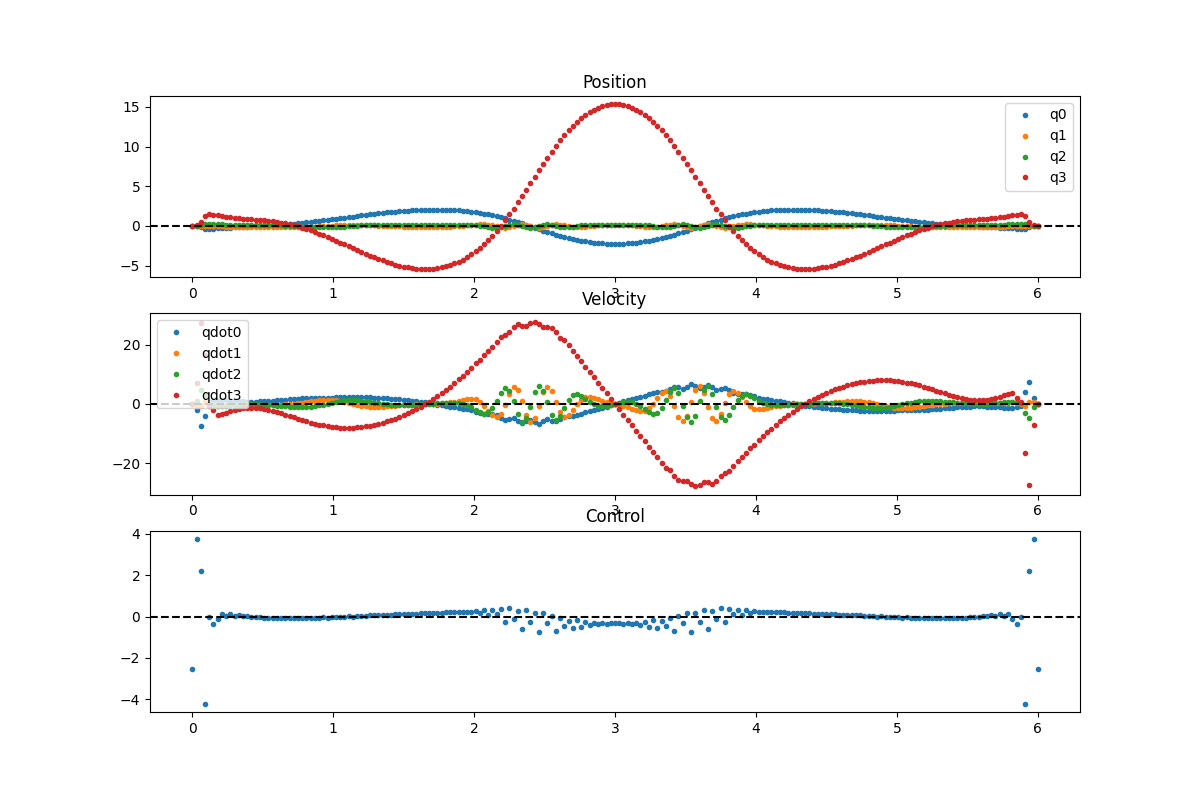

In [34]:
# plot
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(12,8))

axs[0].set_title('Position')
axs[1].set_title('Velocity')
for i in range(4):
    axs[0].plot(sol_t, sol_x[i], '.', label=f'q{i}')
    axs[1].plot(sol_t, sol_x[i+4], '.', label=f'qdot{i}')
    axs[0].legend()
    axs[1].legend()


axs[2].plot(sol_t, np.squeeze(sol_u), '.')
axs[2].set_title('Control')

for ax in axs:
    ax.axhline(0, color='k', linestyle='--')
plt.show()

In [35]:
# save solution to numpy file
np.savez('sol.npz', t=sol_t, x=sol_x, u=sol_u)
solload = np.load('sol.npz')
solload

NpzFile 'sol.npz' with keys: t, x, u

In [36]:
from numpy import sin, cos
[h, r, m, g, h2,  Isx, Isy, Isz,  Iax, Iay, Iaz] = [0.1, 0.05, 0.5, 9.81, -0.01,  9E-4, 9E-4, 25E-4,  4E-9, 9E-9, 9E-9]

def get_pts(q):
    yaw, pit, rol, q4 = q
    pts = np.zeros((6, 3))

    # 124 operations
    x0 = sin(rol)
    x1 = sin(yaw)
    x2 = x0*x1
    x3 = h*x2
    x4 = sin(pit)
    x5 = cos(rol)
    x6 = cos(yaw)
    x7 = x5*x6
    x8 = x4*x7
    x9 = h*x8
    x10 = x3 + x9
    x11 = x0*x6
    x12 = h*x11
    x13 = x1*x5
    x14 = x13*x4
    x15 = h*x14
    x16 = -x12 + x15
    x17 = cos(pit)
    x18 = x17*x5
    x19 = h*x18
    x20 = r*x17
    x21 = 0.29999999999999999*x20
    x22 = r*x4
    x23 = 1.0/(m + 1)
    x24 = h2*m
    x25 = cos(q4)
    x26 = x20*x25
    x27 = x26*x6
    x28 = sin(q4)
    x29 = r*x28
    x30 = m*x29
    x31 = m*x22*x28
    x32 = x1*x26
    x33 = h2*x18
    x34 = x22*x25
    x35 = x0*x17*x29
    pts[0,0] = 0
    pts[0,1] = 0
    pts[0,2] = 0
    pts[1,0] = x10
    pts[1,1] = x16
    pts[1,2] = x19
    pts[2,0] = x10 + x21*x6
    pts[2,1] = x1*x21 + x16
    pts[2,2] = x19 - 0.29999999999999999*x22
    pts[3,0] = x10
    pts[3,1] = x16
    pts[3,2] = x19
    pts[4,0] = x23*(m*x27 + m*x3 + m*x9 + x10 + x11*x31 - x13*x30 + x2*x24 + x24*x8)
    pts[4,1] = x23*(-m*x12 + m*x15 + m*x32 - x11*x24 + x14*x24 + x16 + x2*x31 + x30*x7)
    pts[4,2] = x23*(m*x19 + m*x33 - m*x34 + m*x35 + x19)
    pts[5,0] = h2*(x2 + x8) + x10 + x27 + x29*(x11*x4 - x13)
    pts[5,1] = h2*(-x11 + x14) + x16 + x29*(x2*x4 + x7) + x32
    pts[5,2] = x19 + x33 - x34 + x35

    return pts



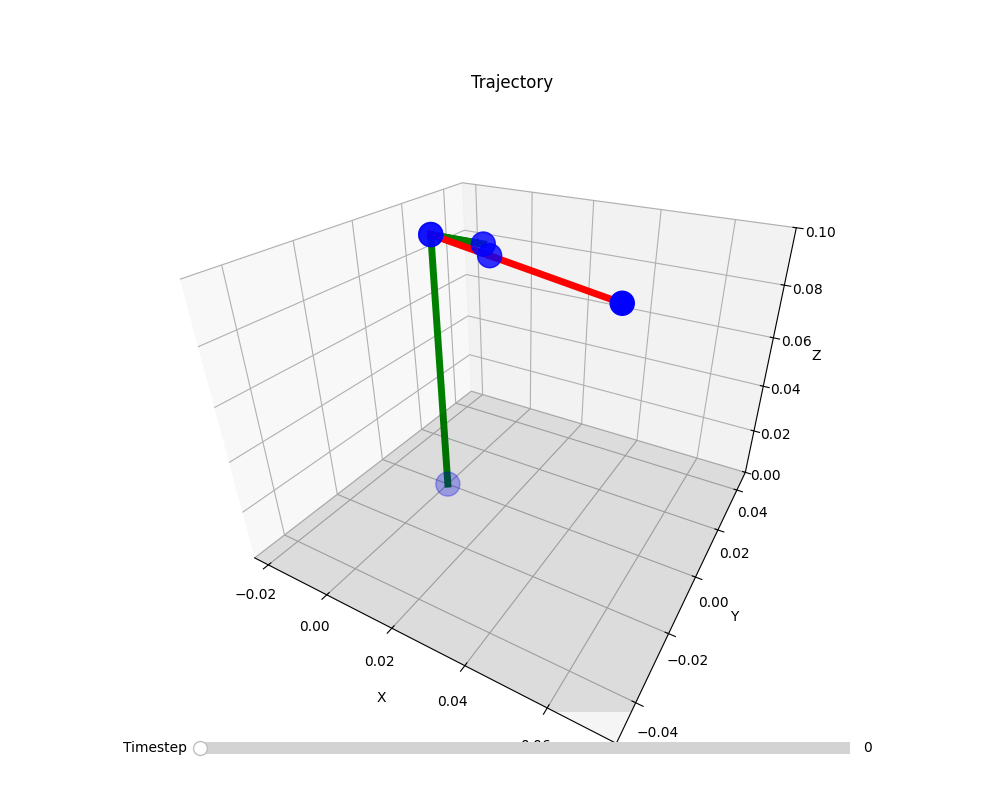

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

# Load the saved data
data = np.load('sol.npz')
x = data['x']  # State trajectory (shape [8, 201] where 201 is num timesteps)
t = data['t']  # Time points
u = data['u']  # Control inputs

# Get the number of timesteps
num_timesteps = x.shape[1]  # Second dimension is time

# Create figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_proj_type('persp', focal_length=0.2)


# Create slider axes
slider_ax = plt.axes([0.2, 0.05, 0.65, 0.03])

# Initialize the points and connections
joint_positions = x[:4, 0]  # First 4 elements are joint positions at timestep 0
key_points = get_pts(joint_positions)  # Get the key points

# Assuming key_points is an array of shape (n_points, 3)
n_points = key_points.shape[0]

# Plot points
points = ax.scatter(key_points[:, 0], key_points[:, 1], key_points[:, 2], 
                    color='blue', s=300)

# Plot connections with thick line segments
lines_shell = []
lines_pen = []
for i in range(0, 3):
    line, = ax.plot([key_points[i, 0], key_points[i+1, 0]],
                    [key_points[i, 1], key_points[i+1, 1]],
                    [key_points[i, 2], key_points[i+1, 2]],
                    linewidth=5, color='green')
    lines_shell.append(line)
for i in range(3, n_points - 1):
    line, = ax.plot([key_points[i, 0], key_points[i+1, 0]],
                    [key_points[i, 1], key_points[i+1, 1]],
                    [key_points[i, 2], key_points[i+1, 2]],
                    linewidth=5, color='red')
    lines_pen.append(line)

# Set axis limits with some padding
x_data = key_points[:, 0]
y_data = key_points[:, 1]
z_data = key_points[:, 2]
max_range = np.max([np.ptp(x_data), np.ptp(y_data), np.ptp(z_data)])
mid_x = np.mean([np.max(x_data), np.min(x_data)])
mid_y = np.mean([np.max(y_data), np.min(y_data)])
mid_z = np.mean([np.max(z_data), np.min(z_data)])
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx,yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
ax.plot_surface(xx, yy, np.zeros_like(xx), color='k', alpha=0.1)


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajectory')

# Create slider
timestep_slider = Slider(slider_ax, 'Timestep', 0, num_timesteps-1, 
                         valinit=0, valstep=1)

# Update function for slider
def update(val):
    # Get the current timestep from slider
    timestep = int(timestep_slider.val)
    
    # Get joint positions at this timestep (corrected indexing)
    joint_positions = x[:4, timestep]
    
    # Calculate key points
    key_points = get_pts(joint_positions)
    
    # Update points
    points._offsets3d = (key_points[:, 0], key_points[:, 1], key_points[:, 2])
    
    # Update connecting lines
    for i in range(0, 3):
        lines_shell[i].set_data([key_points[i, 0], key_points[i+1, 0]], 
                          [key_points[i, 1], key_points[i+1, 1]])
        lines_shell[i].set_3d_properties([key_points[i, 2], key_points[i+1, 2]])
    for i in range(3, n_points - 1):
        lines_pen[i-3].set_data([key_points[i, 0], key_points[i+1, 0]], 
                          [key_points[i, 1], key_points[i+1, 1]])
        lines_pen[i-3].set_3d_properties([key_points[i, 2], key_points[i+1, 2]])
    
    # Draw the updated plot
    fig.canvas.draw_idle()

# Connect the slider to the update function
timestep_slider.on_changed(update)



# Display the plot
# plt.tight_layout()
plt.show()

t=0.2985074626865672 s
t=0.3283582089552239 s
t=0.3582089552238806 s
t=0.3880597014925373 s
t=0.417910447761194 s
t=0.4477611940298507 s
t=0.47761194029850745 s
t=0.5074626865671642 s
t=0.5373134328358209 s
t=0.5671641791044776 s
t=0.5970149253731344 s
t=0.6268656716417911 s
t=0.6567164179104478 s
t=0.6865671641791045 s
t=0.7164179104477612 s
t=0.746268656716418 s
t=0.7761194029850746 s
t=0.8059701492537313 s
t=0.835820895522388 s
t=0.8656716417910448 s
t=0.8955223880597014 s
t=0.9253731343283582 s
t=0.9552238805970149 s
t=0.9850746268656716 s
t=1.0149253731343284 s
t=1.0447761194029852 s
t=1.0746268656716418 s
t=1.1044776119402986 s
t=1.1343283582089552 s
t=1.164179104477612 s
t=1.1940298507462688 s
t=1.2238805970149254 s
t=1.2537313432835822 s
t=1.2835820895522387 s
t=1.3134328358208955 s
t=1.3432835820895523 s
t=1.373134328358209 s
t=1.4029850746268657 s
t=1.4328358208955223 s
t=1.462686567164179 s
t=1.492537313432836 s
t=1.5223880597014925 s
t=1.5522388059701493 s
t=1.5820895522388

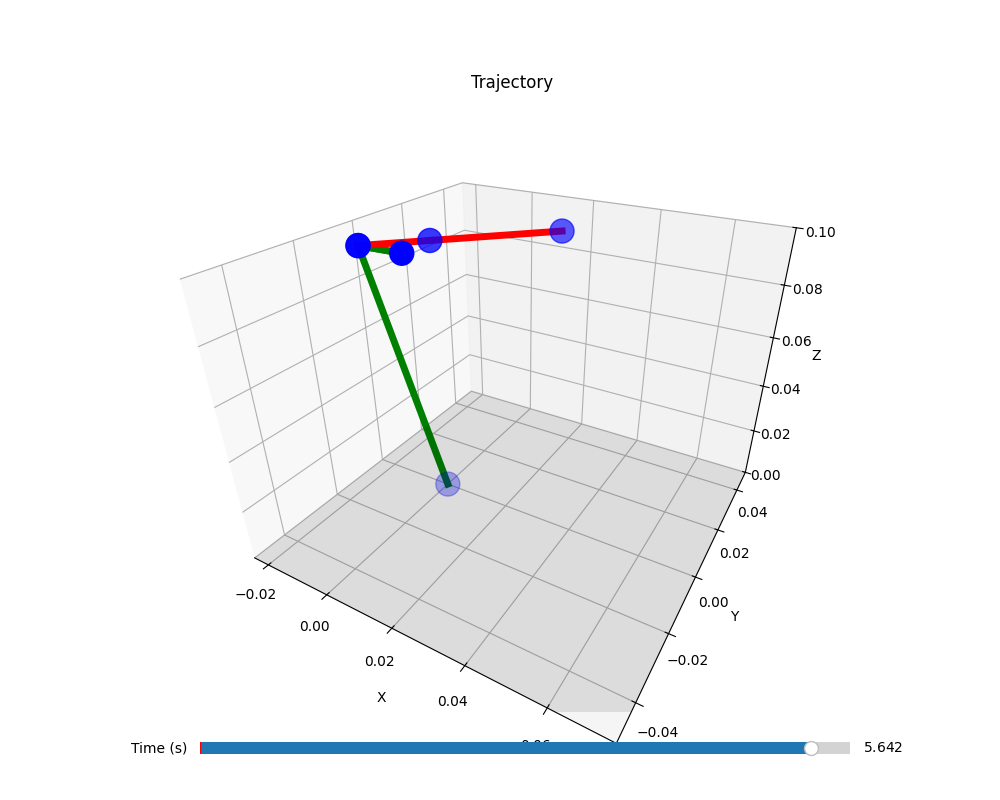

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

# Load the saved data
data = np.load('sol.npz')
x = data['x']  # State trajectory (shape [8, 201] where 201 is num timesteps)
t = data['t']  # Time points
u = data['u']  # Control inputs

# Get the number of timesteps
num_timesteps = x.shape[1]  # Second dimension is time

# Create figure and axes
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.set_proj_type('persp', focal_length=0.2)


# Create slider axes
slider_ax = plt.axes([0.2, 0.05, 0.65, 0.03])

# Initialize the points and connections
joint_positions = x[:4, 0]  # First 4 elements are joint positions at timestep 0
key_points = get_pts(joint_positions)  # Get the key points

# Assuming key_points is an array of shape (n_points, 3)
n_points = key_points.shape[0]

# Plot points
points = ax.scatter(key_points[:, 0], key_points[:, 1], key_points[:, 2], 
                    color='blue', s=300)

# Plot connections with thick line segments
lines_shell = []
lines_pen = []
for i in range(0, 3):
    line, = ax.plot([key_points[i, 0], key_points[i+1, 0]],
                    [key_points[i, 1], key_points[i+1, 1]],
                    [key_points[i, 2], key_points[i+1, 2]],
                    linewidth=5, color='green')
    lines_shell.append(line)
for i in range(3, n_points - 1):
    line, = ax.plot([key_points[i, 0], key_points[i+1, 0]],
                    [key_points[i, 1], key_points[i+1, 1]],
                    [key_points[i, 2], key_points[i+1, 2]],
                    linewidth=5, color='red')
    lines_pen.append(line)

# Set axis limits with some padding
x_data = key_points[:, 0]
y_data = key_points[:, 1]
z_data = key_points[:, 2]
max_range = np.max([np.ptp(x_data), np.ptp(y_data), np.ptp(z_data)])
mid_x = np.mean([np.max(x_data), np.min(x_data)])
mid_y = np.mean([np.max(y_data), np.min(y_data)])
mid_z = np.mean([np.max(z_data), np.min(z_data)])
ax.set_xlim(mid_x - max_range/2, mid_x + max_range/2)
ax.set_ylim(mid_y - max_range/2, mid_y + max_range/2)
ax.set_zlim(mid_z - max_range/2, mid_z + max_range/2)

x_min, x_max = ax.get_xlim()
y_min, y_max = ax.get_ylim()
xx,yy = np.meshgrid(np.linspace(x_min, x_max, 10), np.linspace(y_min, y_max, 10))
ax.plot_surface(xx, yy, np.zeros_like(xx), color='k', alpha=0.1)


# Set labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trajectory')

# Create slider
timestep_slider = Slider(slider_ax, 'Time (s)', 0, tf, 
                         valinit=0, valstep=0.001)

# Update function for slider
def update(val):
    # Get the current timestep from slider
    timestep = val

    actual_time = timestep/(2*N+1) * tf
    timestep_slider.set_val(actual_time)
    
    # Get joint positions at this timestep (corrected indexing)
    joint_positions = x[:4, timestep]
    
    # Calculate key points
    key_points = get_pts(joint_positions)
    
    # Update points
    points._offsets3d = (key_points[:, 0], key_points[:, 1], key_points[:, 2])
    
    # Update connecting lines
    for i in range(0, 3):
        lines_shell[i].set_data([key_points[i, 0], key_points[i+1, 0]], 
                          [key_points[i, 1], key_points[i+1, 1]])
        lines_shell[i].set_3d_properties([key_points[i, 2], key_points[i+1, 2]])
    for i in range(3, n_points - 1):
        lines_pen[i-3].set_data([key_points[i, 0], key_points[i+1, 0]], 
                          [key_points[i, 1], key_points[i+1, 1]])
        lines_pen[i-3].set_3d_properties([key_points[i, 2], key_points[i+1, 2]])
    
    # Draw the updated plot
    # fig.canvas.draw_idle()
    fig.savefig(f'imgs/traj_{timestep:03d}.png')
    print(f"t={actual_time} s")

import os
for f in os.listdir("imgs"):
    if f.endswith(".png"):
        os.remove(os.path.join("imgs", f))
for i in range(10, 190):
    update(i)

# get all png files in this directory that is loss_all
import os
import glob
import numpy as np

png_files = glob.glob("imgs/traj_*.png")
png_files.sort(key=os.path.getmtime)
print(png_files)

from PIL import Image

# Create the frames
frames = []
for i in png_files:
    new_frame = Image.open(i)
    frames.append(new_frame)

# Save into a GIF file that loops forever
frames[0].save('traj.gif', format='GIF',
               append_images=frames[1:],
               save_all=True,
               duration=100, loop=0)
import os
for f in os.listdir("imgs"):
    if f.endswith(".png"):
        os.remove(os.path.join("imgs", f))


['imgs/traj_000.png', 'imgs/traj_001.png', 'imgs/traj_002.png', 'imgs/traj_003.png', 'imgs/traj_004.png', 'imgs/traj_005.png', 'imgs/traj_006.png', 'imgs/traj_007.png', 'imgs/traj_008.png', 'imgs/traj_009.png', 'imgs/traj_010.png', 'imgs/traj_011.png', 'imgs/traj_012.png', 'imgs/traj_013.png', 'imgs/traj_014.png', 'imgs/traj_015.png', 'imgs/traj_016.png', 'imgs/traj_017.png', 'imgs/traj_018.png', 'imgs/traj_019.png', 'imgs/traj_020.png', 'imgs/traj_021.png', 'imgs/traj_022.png', 'imgs/traj_023.png', 'imgs/traj_024.png', 'imgs/traj_025.png', 'imgs/traj_026.png', 'imgs/traj_027.png', 'imgs/traj_028.png', 'imgs/traj_029.png', 'imgs/traj_030.png', 'imgs/traj_031.png', 'imgs/traj_032.png', 'imgs/traj_033.png', 'imgs/traj_034.png', 'imgs/traj_035.png', 'imgs/traj_036.png', 'imgs/traj_037.png', 'imgs/traj_038.png', 'imgs/traj_039.png', 'imgs/traj_040.png', 'imgs/traj_041.png', 'imgs/traj_042.png', 'imgs/traj_043.png', 'imgs/traj_044.png', 'imgs/traj_045.png', 'imgs/traj_046.png', 'imgs/traj_0